<a href="https://colab.research.google.com/github/Abhirajsinghchandrawat/Color-Detection/blob/main/Color_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COLOR DETECTION USING DATA ANALYSIS

In [6]:
from google.colab import files

uploaded = files.upload()  # This will prompt you to upload files


Saving colorpic.jpg to colorpic (1).jpg
Saving colors.csv to colors (1).csv
Saving pic1.jpg to pic1 (1).jpg
Saving pic2.jpg to pic2 (1).jpg
Saving pic3.jpg to pic3 (1).jpg


In [7]:
!pip install opencv-python pandas


In [8]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Upload image and color dataset
img_path = 'pic2.jpg'  # Ensure this image is uploaded
csv_path = 'colors.csv'  # Ensure this CSV file is uploaded

# Read the color dataset
columns = ['color', 'color_name', 'hex', 'R', 'G', 'B']
df = pd.read_csv(csv_path, names=columns, header=None)

# Read the image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct color display


In [9]:
# Function to get the closest matching color name
def get_color_name(R, G, B):
    min_dist = float('inf')
    color_name = ''
    for i in range(len(df)):
        d = abs(R - int(df.loc[i, 'R'])) + abs(G - int(df.loc[i, 'G'])) + abs(B - int(df.loc[i, 'B']))
        if d < min_dist:
            min_dist = d
            color_name = df.loc[i, 'color_name']
    return color_name


In [10]:
# Define a function to get color from a specific pixel
def get_color_at_pixel(x, y):
    r, g, b = img[y, x]  # Extract RGB values at the clicked location
    color_name = get_color_name(r, g, b)
    return color_name, (r, g, b)

# Example usage (Click manually in an image viewer and enter coordinates)
x, y = 250, 250  # Manually specify a point
color_name, (r, g, b) = get_color_at_pixel(x, y)

# Print the detected color
print(f"Detected Color: {color_name}, RGB: ({r}, {g}, {b})")


Detected Color: Blanched Almond, RGB: (226, 180, 33)


<ipython-input-9-5a932912774d>:6: RuntimeWarning: overflow encountered in scalar subtract
  d = abs(R - int(df.loc[i, 'R'])) + abs(G - int(df.loc[i, 'G'])) + abs(B - int(df.loc[i, 'B']))
<ipython-input-9-5a932912774d>:6: RuntimeWarning: overflow encountered in scalar add
  d = abs(R - int(df.loc[i, 'R'])) + abs(G - int(df.loc[i, 'G'])) + abs(B - int(df.loc[i, 'B']))


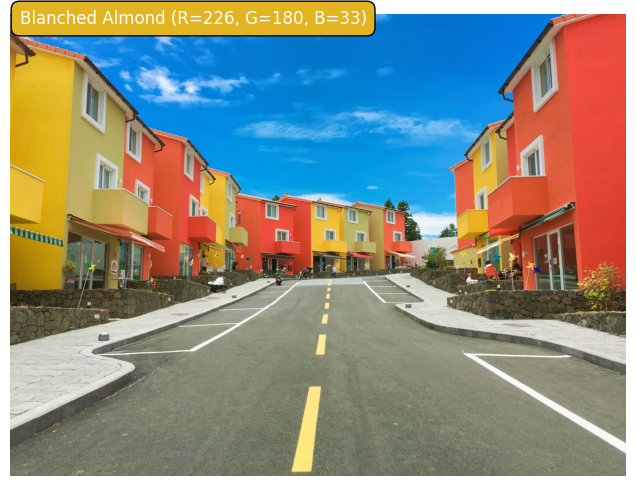

In [11]:
# Draw rectangle and text on image
plt.figure(figsize=(8, 6))
plt.imshow(img)

# Display color information
plt.text(50, 50, f"{color_name} (R={r}, G={g}, B={b})", fontsize=12, color='white',
         bbox=dict(facecolor=(r/255, g/255, b/255), edgecolor='black', boxstyle='round,pad=0.5'))

# Show the modified image
plt.axis('off')
plt.show()
